In [327]:
import pandas as pd
from sklearn.datasets import make_regression

In [328]:
x,y = make_regression(n_features=1, noise=30, random_state=0)
df = pd.DataFrame(x)
df.columns = ["x"]
df["y"] = y
df

,x,y
0,-0.359553,-29.387972
1,0.976639,-18.771359
2,0.402342,0.563777
3,-0.813146,19.905024
4,-0.887786,-31.843421
...,...,...
95,-1.165150,-46.555436
96,-0.362741,29.346690
97,0.356366,5.143858
98,-1.613898,-21.482798


<Axes: ylabel='Frequency'>

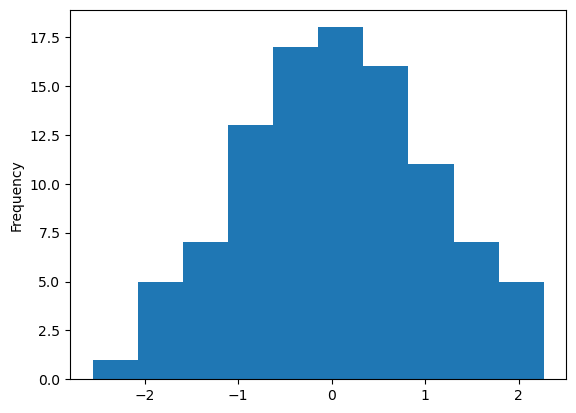

In [329]:
df["x"].plot(kind="hist")

In [330]:
import numpy as np
y_mean = np.array([y.mean()] * 100)
y_mean.shape
print(x.shape)
print(y_mean.shape)


(100, 1)
(100,)


In [331]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_2 = LinearRegression()
model_3 = LinearRegression()

model_1.fit(x,y)

LinearRegression()

In [332]:
y_pred = model_1.predict(x)

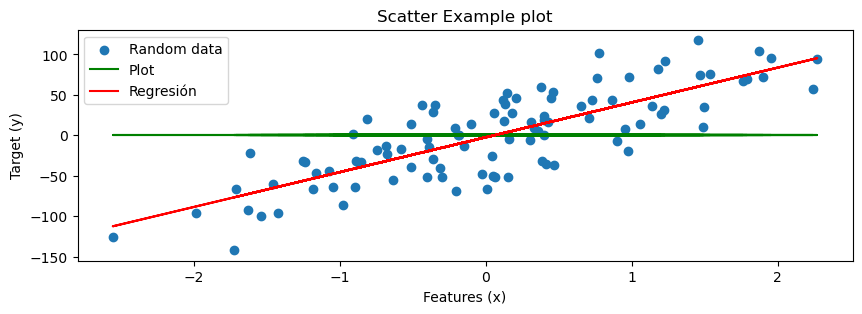

In [333]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
plt.scatter(x, y, label = "Random data") #Scatter me da un gráfico de dispersión

plt.plot(x, y_mean,label ="Plot", c="green") #Plot me da la relación entre los puntos
plt.plot(x, y_pred, label = "Regresión", c="red")
plt.xlabel("Features (x)")
plt.ylabel("Target (y)")
plt.title("Scatter Example plot")
plt.legend()
plt.savefig("../reports/figures/random1.svg")

# Activity

- Dataset: Boston Housing
- X: Top-1 correlate feature with target
- Target: MEDV
- Model: Linear Regression


In [334]:
import seaborn as sns

In [335]:
path = "../data/raw/archive (1)/HousingData.csv"
df_h = pd.read_csv(path)
df_h.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [336]:
h_corr = df_h.corr()
h_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


<Axes: >

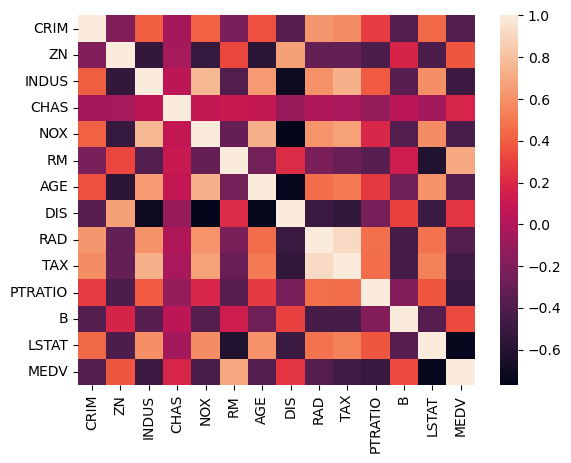

In [337]:
sns.heatmap(h_corr)

In [343]:
x_median = df_h["LSTAT"].median()
medv_mean = np.array([df_h["MEDV"].mean()] * 506)
df_h["LSTAT"] = df_h["LSTAT"].fillna(x_median)

In [339]:
model_h = LinearRegression()
y_h = (df_h["MEDV"]).values.reshape(-1,1)
x_reg = (df_h["LSTAT"]).values.reshape(-1,1)
model_h.fit(x_reg,y_h)
y_predict = model_h.predict(x_reg)
x_h = df_h["LSTAT"]

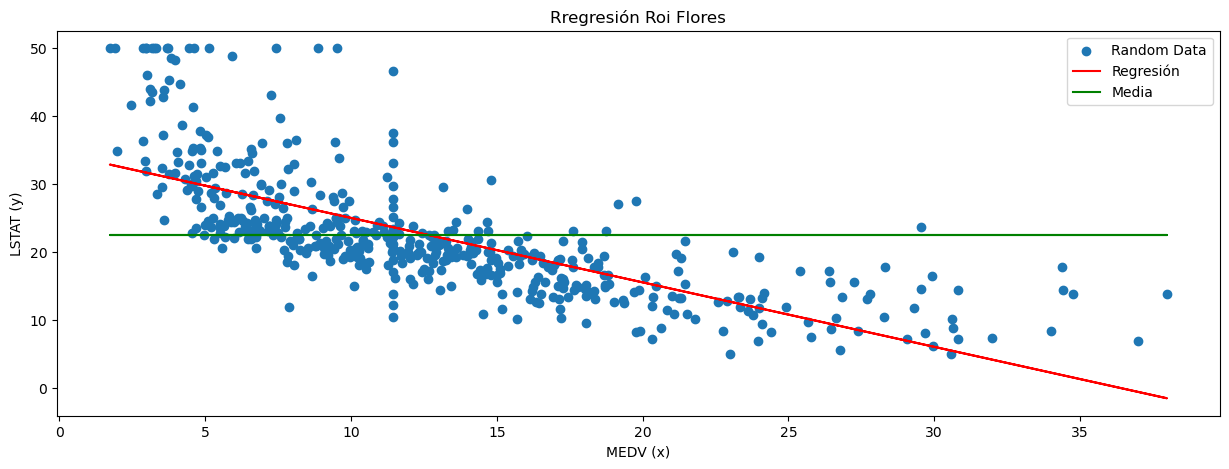

In [346]:
plt.figure(figsize=(15,5))
plt.scatter(x_h,y_h, label="Random Data")
plt.plot(x_reg, y_predict, label ="Regresión", c="red")
plt.plot(x_reg, medv_mean, label="Media", c="green")
plt.xlabel("MEDV (x)")
plt.ylabel("LSTAT (y)")
plt.title("Rregresión Roi Flores")
plt.legend()